In [1]:
%matplotlib inline

import torch
import torch.optim as optim
from matplotlib import pyplot as plt

### PyTorch module is a Python class deriving from the nn.Module base class

In [2]:
import torch.nn as nn

t_un_val = torch.tensor([[1.],[2.]])

# number of input "features", number of "output" features, bias default = True
linear_model = nn.Linear(1,1)
linear_model(t_un_val)

tensor([[0.0384],
        [0.6323]], grad_fn=<AddmmBackward>)

In [3]:
linear_model.weight, linear_model.bias

(Parameter containing:
 tensor([[0.5939]], requires_grad=True),
 Parameter containing:
 tensor([-0.5555], requires_grad=True))

In [4]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

t_u.shape

torch.Size([11, 1])

In [5]:
linear_model = nn.Linear(1, 1)
optimizer = optim.Adam(
    linear_model.parameters(),
    lr=1e-2)
    
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.3994]], requires_grad=True),
 Parameter containing:
 tensor([-0.4688], requires_grad=True)]

In [6]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train,t_c_train):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f}")

In [7]:
training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_u,
    t_c_train = t_c)

print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 1230.9304
Epoch 1000, Training loss 23.3292
Epoch 2000, Training loss 14.0626
Epoch 3000, Training loss 7.1036
Epoch 4000, Training loss 3.8327
Epoch 5000, Training loss 3.0062
Parameter containing:
tensor([[0.5201]], requires_grad=True)
Parameter containing:
tensor([-16.3594], requires_grad=True)


In [8]:
seq_model = nn.Sequential(
    nn.Linear(1,13),
    nn.Tanh(),
    nn.Linear(13,1)
)

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [9]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [10]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [16]:
optimizerS = optim.Adam(
    seq_model.parameters(),
    lr=1e-2)

training_loop(
    n_epochs = 5000,
    optimizer = optimizerS,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_u,
    t_c_train = t_c)

print('output', seq_model(t_u))
print('answer', t_c)

Epoch 1, Training loss 1.8411
Epoch 1000, Training loss 1.8358
Epoch 2000, Training loss 1.8285
Epoch 3000, Training loss 1.8214
Epoch 4000, Training loss 1.8121
Epoch 5000, Training loss 1.8028
output tensor([[ 1.9904],
        [11.7741],
        [13.3899],
        [27.8998],
        [12.0475],
        [ 7.5910],
        [ 1.2937],
        [-3.8503],
        [ 7.3355],
        [15.0175],
        [21.0138]], grad_fn=<AddmmBackward>)
answer tensor([[ 0.5000],
        [14.0000],
        [15.0000],
        [28.0000],
        [11.0000],
        [ 8.0000],
        [ 3.0000],
        [-4.0000],
        [ 6.0000],
        [13.0000],
        [21.0000]])


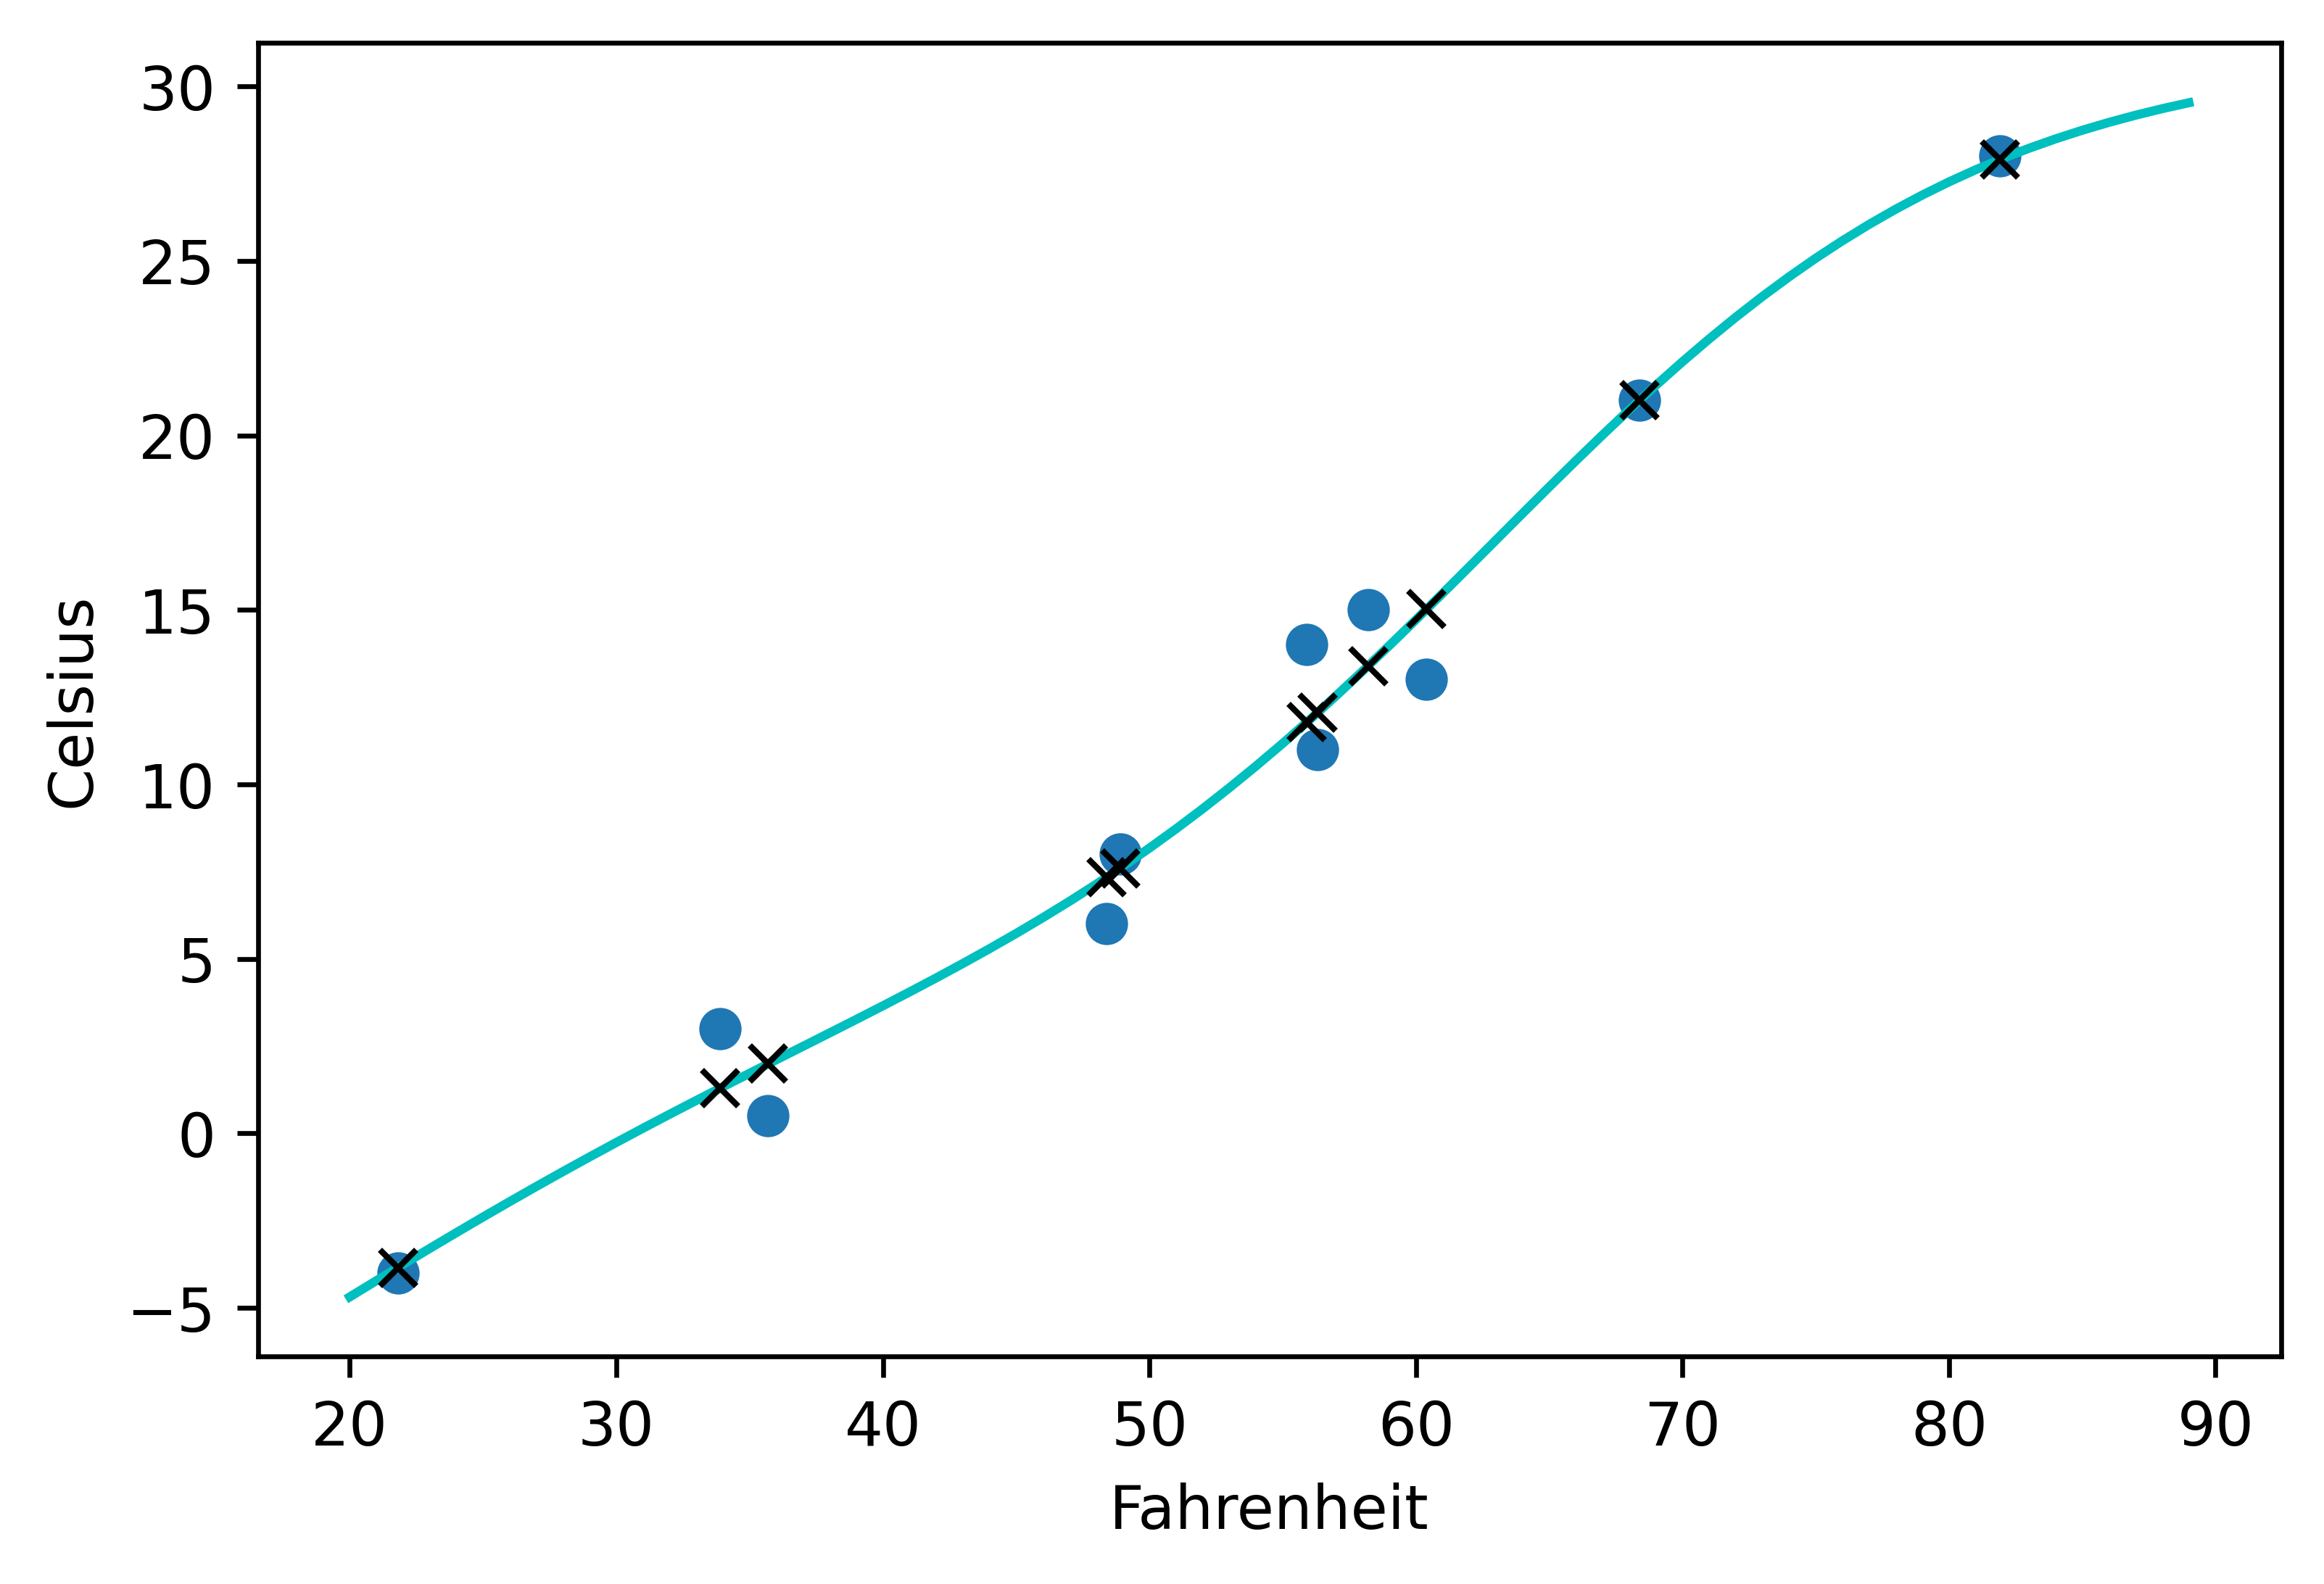

In [19]:
t_range = torch.arange(20., 90.).unsqueeze(1)
fig = plt.figure(dpi=600)

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(t_u).detach().numpy(), 'kx')

## Exercice